# **BigMart Sales Prediction**

## **Problem Statement**
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.


## **Project Goal**
To build a predictive model and find out the sales of each product per particular store.

### **Needed Modules**
Now we will import the libraries or modules we'll need in our project

In [1]:
#for data manipulation
import numpy as np
import pandas as pd

#for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#splitting the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


#for feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#for models evaluation metrics
from sklearn.metrics import r2_score as R2

#ML models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### **Data Reading, Exploring and Preparation**

In [2]:
#import the training dataset
train_data = pd.read_csv('Train.csv')
#view the top rows
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#reading our dataset size
train_data.shape

(8523, 12)

In [4]:
#getting an intution about our data's types and features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
#import the testing dataset
test_data = pd.read_csv('Test.csv')
#view the top rows
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
#making sure the test data is relevant by using the info() method of both testing data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
#lets check if there are any missing values in the training data
train_data.isnull().sum(), test_data.isnull().sum()

(Item_Identifier                 0
 Item_Weight                  1463
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  2410
 Outlet_Location_Type            0
 Outlet_Type                     0
 Item_Outlet_Sales               0
 dtype: int64,
 Item_Identifier                 0
 Item_Weight                   976
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  1606
 Outlet_Location_Type            0
 Outlet_Type                     0
 dtype: int64)

In [9]:
#Since we have missing values, let's see their percentage in our data
(train_data.isnull().sum()/train_data.shape[0]) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [10]:
(test_data.isnull().sum()/test_data.shape[0]) * 100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

Both datasets have the same percentage of missing values also, in the same features..

As our dataset only consists of about **8500** records, deleting the rows that has **null** values will not be the most proper action. The dataset is not that big and getting rid of these records might have significant effect.

So, we're going to try to fill these empty cells with appropriate methods. We have two columns/ features that have missing values, one with numerical values (**Item_Weight**), and the other has categorical values (**Outlet_Size**).

Let's firstly work with **Item_Weight**. We can take a look at the data distribution to see how spreaded our data points are and to figure out if there are any outliers.

The best way to visualize the above is using ***Box Plots***

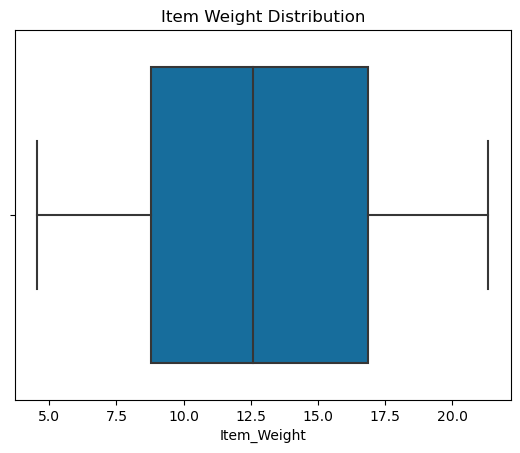

In [11]:
sns.boxplot(x=train_data.Item_Weight, palette='colorblind')
plt.title("Item Weight Distribution");

Since we did not notice any outliers in our weights, filling the missing rows with the ***mean*** will be the most realistic solution.

Having a not so wide range of values also supports this finding.

In [12]:
#let's firstly find the mean
weights_mean = round(train_data.Item_Weight.mean(),2)
weights_mean

12.86

In [13]:
#Almost as expected.. Now we'll fill the missing values with it
train_data.Item_Weight.fillna(weights_mean, inplace=True)
#Checking for missing values again
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Let's do the same for the testing data..

In [14]:
test_data.Item_Weight.fillna(round(test_data.Item_Weight.mean(),2), inplace=True)
#Checking for missing values again
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Let's move now to the other feature with missing values, ***Outlet_Size***. We can have a quick overview about the unique values and how frequently each one exists. For categorical values, the most used or usual way to fill the missing values is using the ***mode***, which is the most repeated value, let's see if it would be applicable in our case.


In [15]:
#we can view the values using value_counts() method in pandas dataframes
train_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
#checking the percentage of every value
(train_data.Outlet_Size.value_counts()/train_data.shape[0])*100

Medium    32.770151
Small     28.018303
High      10.935117
Name: Outlet_Size, dtype: float64

Having the above results, it will never be realistic at all to fill the missing values using the ***mode***. Because the numbers of each of the value's repititions are so close. It would not be fair to easily assume that all the missing records are **Medium**. So we have to guess another solution.

*We can do it* 💪

To do it simple and quick, I used MS Excel ***Pivot Table*** function  on our training data, as follows below:
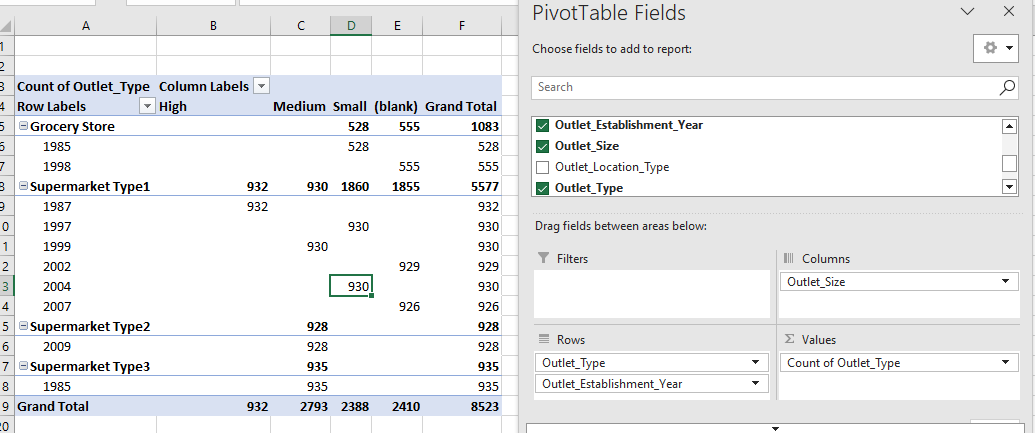

From our table, we can reach this summay:


*   All *Grocery Store* outlets are *Small* so, we're going to fill all the missing *Sizes* that are corresponding to a *Grocery Store* with *Small*
*   We do not actually need any data manipulation for Supermarkets of *Type2* and *Type3*, they are all *Medium* and there are no missing values.

*   For *Supermarket Type1* it's a bit complicated but, using *Establishment Years* to divide the table to another level, I reached some observation. The **BigMart** follows the pattern of: **High -> Small -> Medium** when opening new stores all over the years plus, they focus on one size of *Oultlets* each year they are launching.

*   Hoping our observation was highly accurate, I will fill the missing *Sizes* for **2002** with **High**, and for **2007** with **Medium**.

By the way, the same patterns take place in our testing dataset, as in the below screenshot, so, we'll follow the same steps when preprocessing it later..







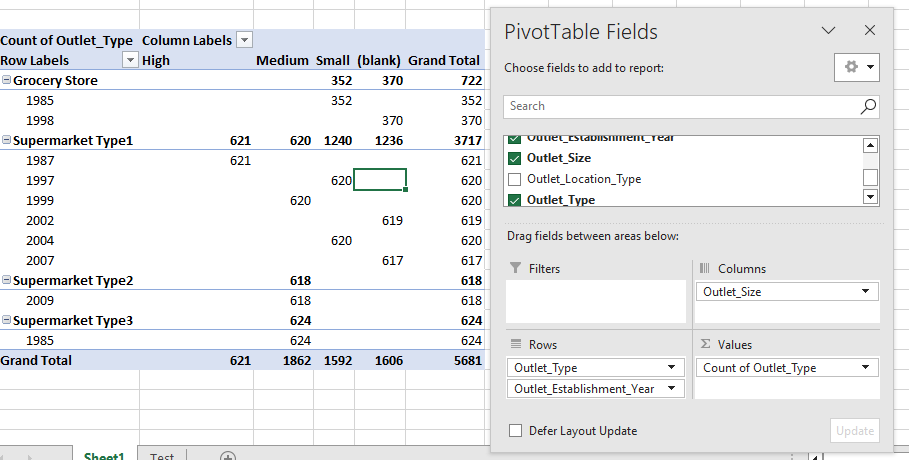

In [17]:
#To fill the grocery stores size
for row in range(len(train_data)):
    if train_data.loc[row,'Outlet_Type'] == 'Grocery Store':
        train_data.loc[row,'Outlet_Size'] = 'Small'
#To check the missing values were reduced
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
#The same for test data
for row in range(len(test_data)):
    if test_data.loc[row,'Outlet_Type'] == 'Grocery Store':
        test_data.loc[row,'Outlet_Size'] = 'Small'
#To check the missing values were reduced
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1236
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Missing values are shrinking 👌😊

In [19]:
#To fill the type1 stores size
for row in range(len(train_data)):
    if (train_data.loc[row,'Outlet_Type'] == 'Supermarket Type1' and train_data.loc[row,'Outlet_Establishment_Year'] == 2002):
        train_data.loc[row,'Outlet_Size'] = 'High'
    if (train_data.loc[row,'Outlet_Type'] == 'Supermarket Type1' and train_data.loc[row,'Outlet_Establishment_Year'] == 2007):
        train_data.loc[row,'Outlet_Size'] = 'Medium'
#To check the missing values were reduced
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
#To fill the type1 stores size
for row in range(len(test_data)):
    if (test_data.loc[row,'Outlet_Type'] == 'Supermarket Type1' and test_data.loc[row,'Outlet_Establishment_Year'] == 2002):
        test_data.loc[row,'Outlet_Size'] = 'High'
    if (test_data.loc[row,'Outlet_Type'] == 'Supermarket Type1' and test_data.loc[row,'Outlet_Establishment_Year'] == 2007):
        test_data.loc[row,'Outlet_Size'] = 'Medium'
#To check the missing values were reduced
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Mission Accomplished ✅



After handling our data's missing values, let's go check for duplicates 🔍

In [21]:
train_data.duplicated().sum(), test_data.duplicated().sum()

(0, 0)

And we're clear of duplicate records..

Now, we'll move to cleaning our categorical data. The features that are believed to be checked on are: ***Item_Fat_Content*** and ***Item_Type***. The others are just identifiers plus, the ***Outlet_Size*** and ***Outlet_Type*** that were previously viewed and taken care of..

So let's start with ***Item_Fat_Content***:

In [22]:
#we can begin with checking the unique values in the column
train_data.Item_Fat_Content.unique(), test_data.Item_Fat_Content.unique()

(array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object),
 array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object))

As we see, some of the people responsible for providing our data did not follow the same criteria when providing typical info, such as, referring to the **Low Fat** products with 3 different expressions as above. So, we should unify the three of them under one word/expression.

In [23]:
#we can easily do this using pandas replace() method
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(to_replace=['low fat', 'LF'], value='Low Fat')
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(to_replace=['reg'], value='Regular')
train_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [24]:
#Test data
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(to_replace=['low fat', 'LF'], value='Low Fat')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(to_replace=['reg'], value='Regular')
test_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

***Item_Fat_Content*** ✅

***Item_Type*** 👀

In [25]:
train_data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [26]:
test_data.Item_Type.unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

Everything seems normal with no duplications nor spelling mistakes..

***Item_Fat_Content*** ✅

***Item_Type*** ✅

Let's go check for outliers in our numerical features: 

**Item_Visibility** 🔍 

**Item_MRP** 🔍 

**Item_Outlet_Sales** 🔍


Let's start with the ***Item_Visibility***, again using *Box Plot*:

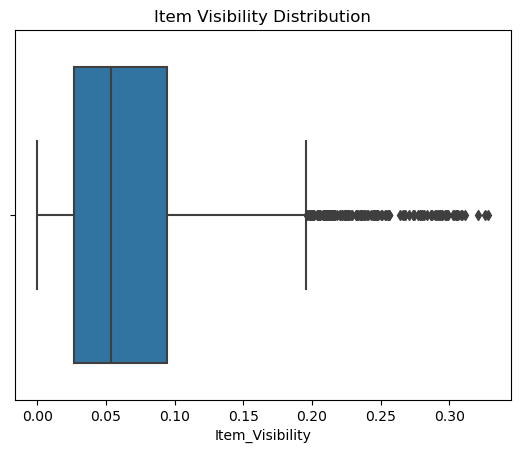

In [27]:
sns.boxplot(x=train_data.Item_Visibility)
plt.title('Item Visibility Distribution');

As it's so obvious that our column has a lot of *Outliers*, we need to pay attention that the range of data is just between **0** and **1**. Also our column is just representing a propability of how much an item might be seen for a customer. So, we'll just keep the data as it was, as it's meaningless to either delete or edit it..

***Item_Visibility*** ✅

***Item_MRP*** 👀

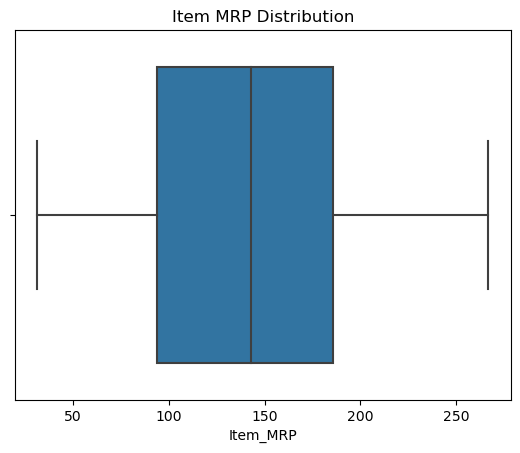

In [28]:
sns.boxplot(x=train_data.Item_MRP)
plt.title('Item MRP Distribution');

Nothing weird above..

***Item_Visibility*** ✅

***Item_MRP*** ✅

***Item_Outlet_Sales*** 👀

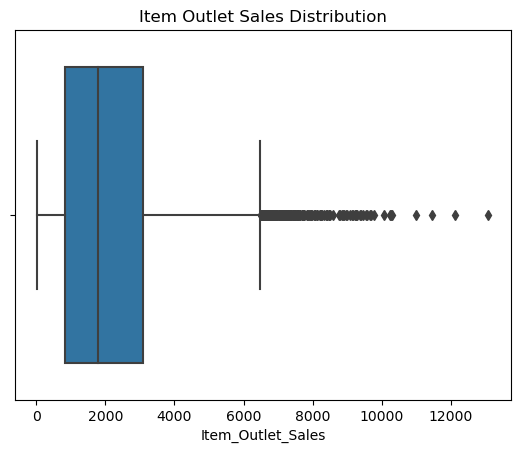

In [29]:
sns.boxplot(x=train_data.Item_Outlet_Sales)
plt.title('Item Outlet Sales Distribution');

Let's create a function to read our ***Box Plot***'s limits properly..

In [30]:
def remove_outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit, Q1, Q3
#upper and lower ranges
upper, lower, Q1, Q3 = remove_outliers(train_data, "Item_Outlet_Sales")
lower, Q1, Q3, upper

(-2566.3261, 834.2474, 3101.2964, 6501.8699)

In [31]:
#let's see how much is above the upper limit
len(train_data[train_data['Item_Outlet_Sales'] > upper])

186

In [32]:
len(train_data[train_data['Item_Outlet_Sales'] < lower])

0

Since both amounts of points beyond our limits are so small, we can just drop them out..

In [33]:
#both are negligible
train_data=train_data[train_data['Item_Outlet_Sales'] < upper]

We can also check the total **Sales** per each year..

In [34]:
Sales_per_Year=train_data.groupby('Outlet_Establishment_Year')[['Item_Outlet_Sales']].sum().sort_values(by='Item_Outlet_Sales', ascending = False)
Sales_per_Year

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,2.821188e+06
2004,2.153951e+06
1999,2.106249e+06
1997,2.042211e+06
1987,2.033081e+06
2007,2.025425e+06
2002,1.966751e+06
2009,1.831713e+06
1998,1.883402e+05


Let's visulaize the above for more clear insights..

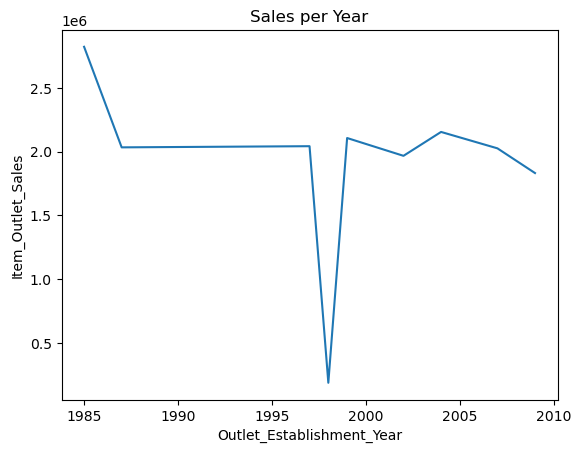

In [35]:
sns.lineplot(Sales_per_Year, x=Sales_per_Year.index, y=Sales_per_Year.Item_Outlet_Sales)
plt.title('Sales per Year');

This should give an alert to the BigMart management as the sales are either still or decreasing over the years..

To have a deeper look on our data, we can perform some ***Univarite*** and ***Bivariate Analysis***..

### **Univariate Analysis**






*   *Count of Sales per Item Type*



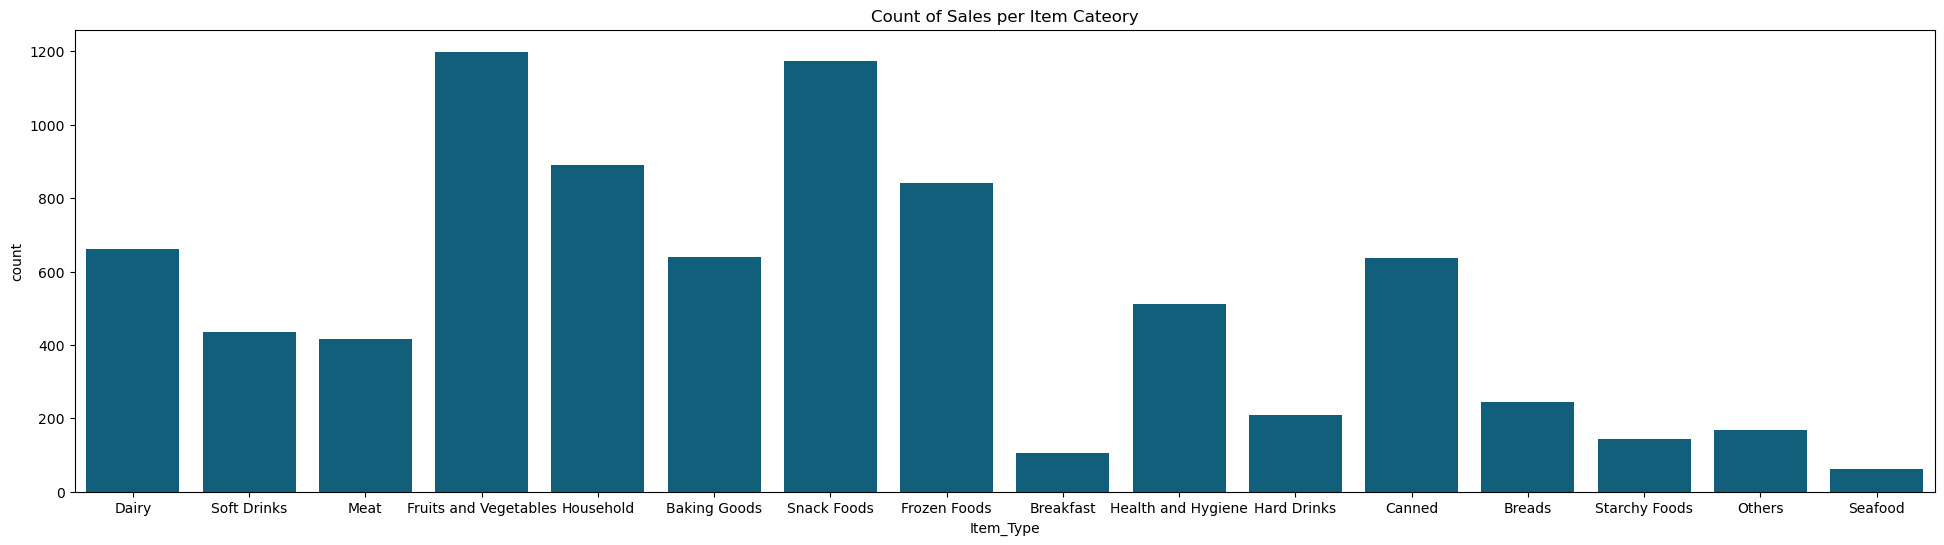

In [36]:
plt.figure(figsize=(24,6))
sns.countplot(x=train_data.Item_Type, color='#00688B');
plt.title('Count of Sales per Item Cateory');

Looks like *Fruits and Vegetables* and *Snack Foods* are our top items which makes sense.

* *Count of each Outlet Type*

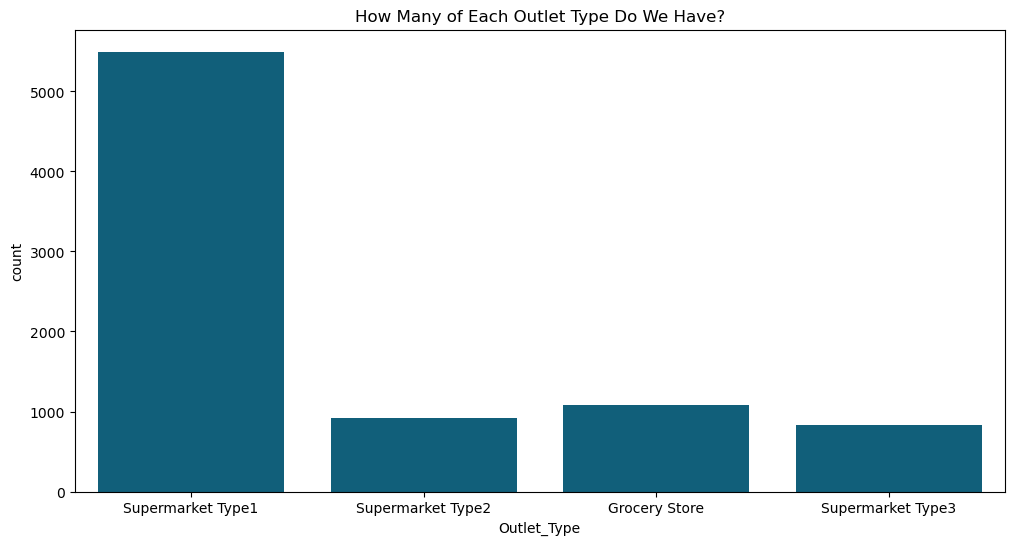

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_data.Outlet_Type, color='#00688B');
plt.title('How Many of Each Outlet Type Do We Have?');

The above plot is supposed to explain the expected to see big difference in sales when we check on it per **Outlet_Type**.

* *Count of Outlets per Size*

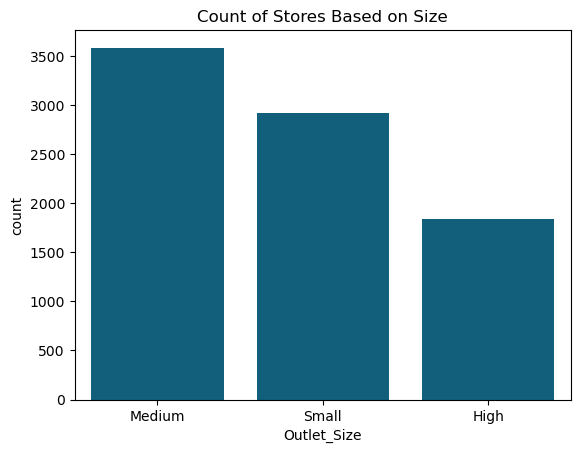

In [38]:
sns.countplot(x=train_data.Outlet_Size, color='#00688B');
plt.title('Count of Stores Based on Size');

The company is more likely to invest in way more in *Small* and *Medium* stores rather than *High* ones. 

Does this reflects on ***Sales per Outlet Size***? Let's find out!

### **Bivariate Analysis**

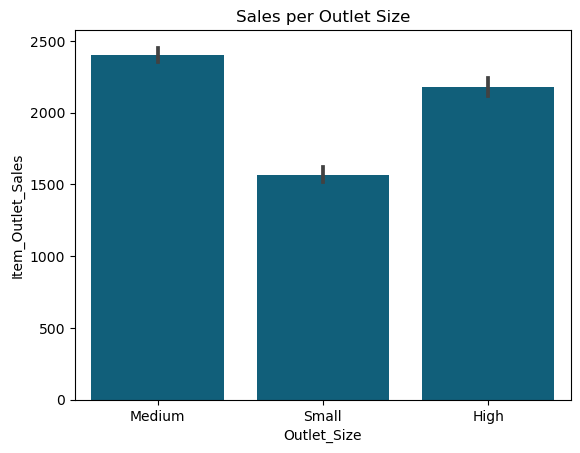

In [39]:
sns.barplot(train_data, x=train_data.Outlet_Size, y=train_data.Item_Outlet_Sales, color='#00688B')
plt.title('Sales per Outlet Size');

So, the answer to our previous question is definetley, No! 

Despite the *High* size count is way less than the other two, it still acheives high sales to the company.

Let us check if this somehow is related to the average of prices ***Item_MRP*** at each kind of store..

In [40]:
train_data.groupby('Outlet_Size')[['Item_MRP']].mean().sort_values(by='Item_MRP', ascending=False)

,Item_MRP
Outlet_Size,
Small,140.949433
High,139.973693
Medium,137.288533


So, the *Small* stores have the highest average of prices but not high enough to compete the other types in the total revenue..

Going on with investigating how our *Sales* are achieved, let's see how much do we sell per ***Item_Type***

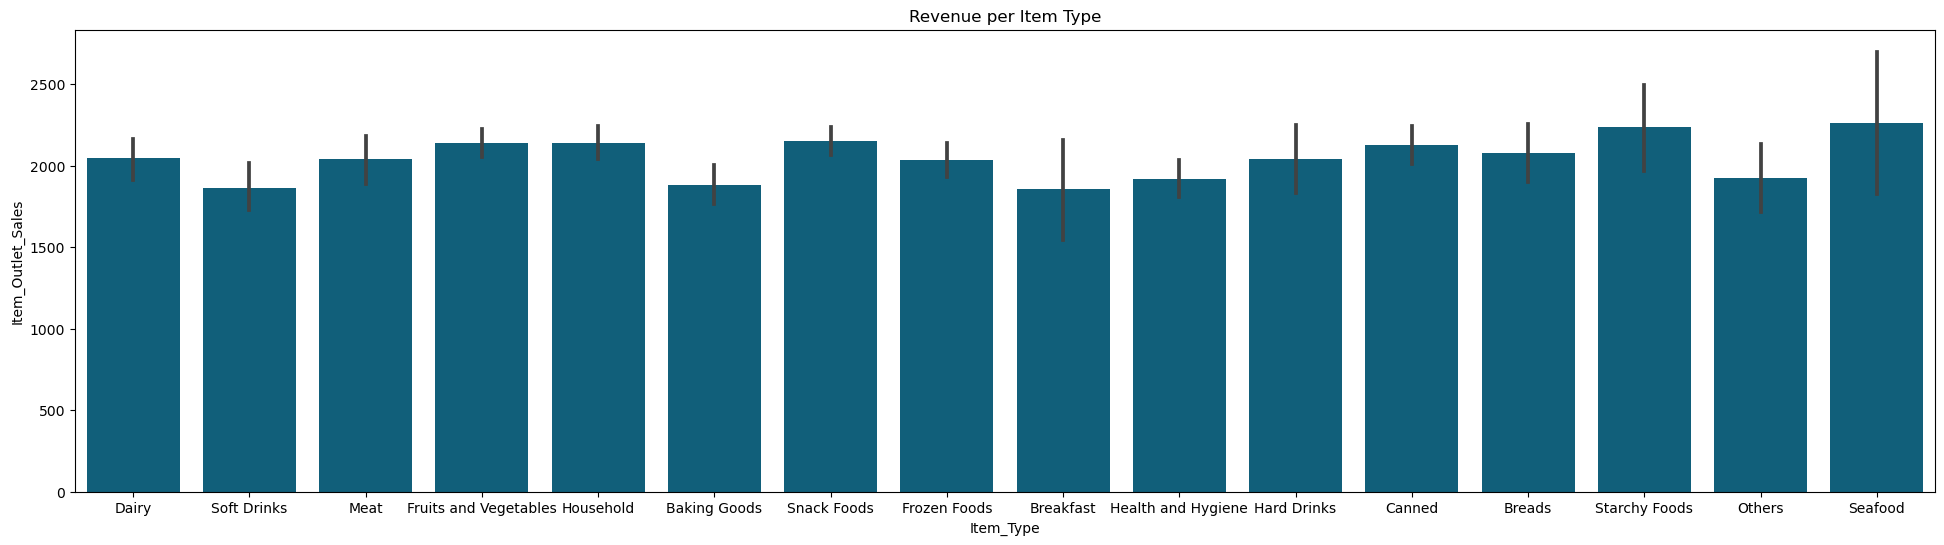

In [41]:
plt.figure(figsize=(24,6))
sns.barplot(train_data, x=train_data.Item_Type, y=train_data.Item_Outlet_Sales, color='#00688B')
plt.title('Revenue per Item Type');

WOW! Despite *Seafood* came least in terms of number of *Sales*, it's coming first now in the revenue entered to the company per item.

Let us discover our top 3 selling stores and which Tier do they belong to..

In [42]:
train_data.groupby(['Outlet_Identifier', 'Outlet_Location_Type'])[['Item_Outlet_Sales']].sum().sort_values(by='Item_Outlet_Sales', ascending = False).head(3)

,,Item_Outlet_Sales
Outlet_Identifier,Outlet_Location_Type,
OUT027,Tier 3,2.641494e+06
OUT035,Tier 2,2.153951e+06
OUT049,Tier 1,2.106249e+06


Looks like the ***Tier*** the store belongs to does not make much difference in the Revenue. To double check, let's visualize the Revenue per each ***Tier***

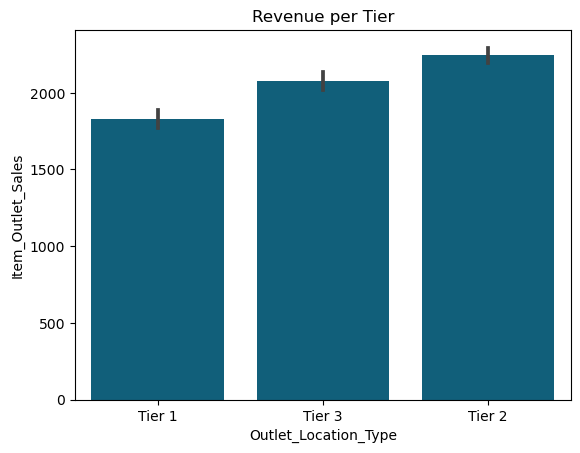

In [43]:
sns.barplot(train_data, x=train_data.Outlet_Location_Type, y=train_data.Item_Outlet_Sales, color='#00688B')
plt.title('Revenue per Tier');

Just as expected, no big difference noted!

Let's finally check the relevancy between ***Item_Visibility*** and Revenue


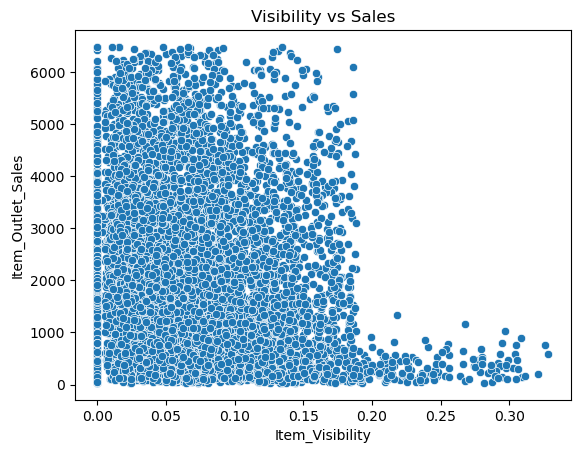

In [44]:
sns.scatterplot(train_data, x='Item_Visibility', y='Item_Outlet_Sales')
plt.title('Visibility vs Sales');

I can call the above visualization, scary! 

Because if the revenue decreases when the items visibility increases, even if this applies on a small range of the data, there must be something wrong. Maybe the planning team of the stores need to reorganize and reallocate the goods in the stores.

### **Encoding Categorical Values**

When transforming categorical variables into numerical ones we follow these methods:


*   For Ordinal data, we use ***Label Encoding***
*   For Nominal data, we use ***One Hot Encoding***



#### **Label Encoding**

In [45]:
ordinals = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Establishment_Year']
le = LabelEncoder()

for col in ordinals:
    train_data[col] = le.fit_transform(train_data[col])

train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,4,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,8,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,4,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,3,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1,0,2,1,994.7052


In [46]:
#Repeating for test data
for col in ordinals:
    test_data[col] = le.fit_transform(test_data[col])

test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,4,1,0,1
1,FDW14,8.300,1,0.038428,Dairy,87.3198,OUT017,7,1,1,1
2,NCN55,14.600,0,0.099575,Others,241.7538,OUT010,3,2,2,0
3,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,7,1,1,1
4,FDY38,12.700,1,0.118599,Dairy,234.2300,OUT027,0,1,2,3


#### **One Hot Encoding**

In [47]:
nominals = ['Item_Type']
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(ohe.fit_transform(train_data[nominals])).astype('int64')

#get feature columns
data_oh.columns = ohe.get_feature_names_out(nominals)
#One-hot encoding removed index; put it back
data_oh.index = train_data.index

#Data after feature engineering
data_fe = pd.concat([train_data, data_oh], axis=1)
data_fe.head()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,8,1,2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,4,1,0,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,3,2,2,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1,0,2,...,0,0,0,1,0,0,0,0,0,0


In [48]:
#Getting our testing features encoded
test_data_oh = pd.DataFrame(ohe.fit_transform(test_data[nominals])).astype('int64')
test_data_oh.columns = ohe.get_feature_names_out(nominals)
test_data_oh.index = test_data.index
test_data_fe = pd.concat([test_data, test_data_oh], axis=1)
test_data_fe.head()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDW58,20.750,0,0.007565,Snack Foods,107.8622,OUT049,4,1,0,...,0,0,0,0,0,0,0,1,0,0
1,FDW14,8.300,1,0.038428,Dairy,87.3198,OUT017,7,1,1,...,0,0,0,0,0,0,0,0,0,0
2,NCN55,14.600,0,0.099575,Others,241.7538,OUT010,3,2,2,...,0,0,0,0,0,1,0,0,0,0
3,FDQ58,7.315,0,0.015388,Snack Foods,155.0340,OUT017,7,1,1,...,0,0,0,0,0,0,0,1,0,0
4,FDY38,12.700,1,0.118599,Dairy,234.2300,OUT027,0,1,2,...,0,0,0,0,0,0,0,0,0,0


Since **Item_Identifier** and **Outlet_Identifier** are just IDs for the items and stores, respectively, we can just drop them.  

In [49]:
data_fe= data_fe.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
data_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,Dairy,249.8092,4,1,0,1,3735.1380,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,Soft Drinks,48.2692,8,1,2,2,443.4228,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,Meat,141.6180,4,1,0,1,2097.2700,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,Fruits and Vegetables,182.0950,3,2,2,0,732.3800,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,Household,53.8614,1,0,2,1,994.7052,...,0,0,0,1,0,0,0,0,0,0


We can also drop the **Item_Type** as we already have a column for each type after encoding..

In [50]:
data_fe= data_fe.drop(['Item_Type'], axis=1)
data_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0,0.016047,249.8092,4,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,8,1,2,2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0,0.016760,141.6180,4,1,0,1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,1,0.000000,182.0950,3,2,2,0,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,1,0,2,1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0


Let's not forget our testing data..

In [51]:
test_data_fe= test_data_fe.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier'], axis=1)
test_data_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750,0,0.007565,107.8622,4,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,8.300,1,0.038428,87.3198,7,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.600,0,0.099575,241.7538,3,2,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315,0,0.015388,155.0340,7,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,12.700,1,0.118599,234.2300,0,1,2,3,0,0,...,0,0,0,0,0,0,0,0,0,0


Before moving to the **Modeling** step, we need to rescale our numerical values for better model performance..

In [52]:
numericals = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

sc = StandardScaler()
for col in numericals:
    data_fe[col] = sc.fit_transform(data_fe[[col]])
data_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Baking Goods,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,-0.836916,0,-0.970594,1.797705,4,1,0,1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.632181,1,-0.908262,-1.476724,8,1,2,2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,1.092426,0,-0.956843,0.039918,4,1,0,1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,1.492411,1,-1.280179,0.697549,3,2,2,0,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,-0.923972,0,-1.280179,-1.385868,1,0,2,1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0


In [53]:
#numericals.remove('Item_Outlet_Sales')
for col in numericals:
    test_data_fe[col] = sc.fit_transform(test_data_fe[[col]])
test_data_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,1.897283,0,-1.134077,-0.536555,4,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.035707,1,-0.531850,-0.868937,7,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.448457,0,0.661316,1.629848,3,2,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-1.267754,0,-0.981416,0.226697,7,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.000852,1,1.032540,1.508110,0,1,2,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X = data_fe.drop('Item_Outlet_Sales', axis=1)
y= data_fe['Item_Outlet_Sales']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6669, 24), (1668, 24), (6669,), (1668,))

## Choosing the Best Machine Learning Model

In [57]:
lr= LinearRegression()
lasso = Lasso()
ridge = Ridge()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100 ,random_state=42)

In [58]:
models = [lr, lasso, ridge, rf, xgb]

In [59]:
for model in models:
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2',n_jobs=-1)
    print(f"R2_Score for {model} is {score.mean()}")

R2_Score for LinearRegression() is 0.4922079107718952
R2_Score for Lasso() is 0.49302902358848205
R2_Score for Ridge() is 0.49222394507015005
R2_Score for RandomForestRegressor(random_state=42) is 0.5383941931847318
R2_Score for XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...) is 0.4871047519428548


It will be better to ignore both the Simple and Regularized Linear Regression models.

Let's focus on the more complex ones..

## **RandomForestRegressor** vs **XGBRegressor**

Let's try to do some hyperparameter tuning to get a better results.

Starting with the ***RandomForestRegressor***

In [60]:
maxR2_rf = 0
best_rf = 0
for trees in range(10, 101, 10):
    for depth in range(2,11):
        rf = RandomForestRegressor(n_estimators=trees, max_depth=depth, random_state=42)
        rf.fit(X_train, y_train)
        yhat = rf.predict(X_test)
        #Uncomment the below line if you want to observe the differences in details with each value
        ##for the estimators and trees depth
        #print(f"R2 Score for {trees} trees with depth of {depth} is {round(R2(y_test, yhat),3)}")
        if R2(y_test,yhat) > maxR2_rf:
            maxR2_rf = round(R2(y_test, yhat),3)
            best_rf = (trees, depth, maxR2_rf)
            
print(f"Random Forests Score: {best_rf[2]}, \nTrees: {best_rf[0]}\nDepth: {best_rf[1]}")

Random Forests Score: 0.579, 
Trees: 20
Depth: 5


To double check, let's to the same for the ***XGBRegressor***

In [61]:
maxR2_xgb = 0
best_xgb= 0
for trees in range(10, 101, 10):
    for depth in range(2,11):
        xgb = XGBRegressor(n_estimators=trees, max_depth=depth, random_state=42)
        xgb.fit(X_train, y_train)
        yhat = xgb.predict(X_test)
        ##Uncomment the below command if you want to observe the differences in details with each value
        ##for the estimators and trees depth
        #print(f"R2 Score for {trees} trees with depth of {depth} is {round(R2(y_test, yhat),3)}")
        if R2(y_test,yhat) > maxR2_xgb:
            maxR2_xgb = round(R2(y_test, yhat),3)
            best_xgb = (trees, depth, maxR2_xgb)
            
print(f"XGB Score: {best_xgb[2]}, \nTrees: {best_xgb[0]}\nDepth: {best_xgb[1]}")

XGB Score: 0.58, 
Trees: 10
Depth: 3


So, the ***XGBRegressor*** is our winner here with a very slight difference..

In [62]:
best_model = XGBRegressor(n_estimators=10, max_depth=3, random_state=42)
best_model.fit(X_train, y_train)

expected_sales = best_model.predict(test_data_fe)
test_data_fe['Final Estimations'] = expected_sales
test_data_fe

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Final Estimations
0,1.897283,0,-1.134077,-0.536555,4,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1626.094238
1,-1.035707,1,-0.531850,-0.868937,7,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1424.133057
2,0.448457,0,0.661316,1.629848,3,2,2,0,0,0,...,0,0,0,0,1,0,0,0,0,637.094482
3,-1.267754,0,-0.981416,0.226697,7,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,2458.656738
4,0.000852,1,1.032540,1.508110,0,1,2,3,0,0,...,0,0,0,0,0,0,0,0,0,4430.248047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-0.517427,1,-1.018333,0.004727,2,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2116.986816
5677,-1.200614,1,1.508493,0.455014,8,1,2,2,0,0,...,0,0,0,0,0,0,0,0,1,2594.777588
5678,-0.635218,0,0.153074,-0.360485,5,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1831.113892
5679,0.613364,1,-1.281690,1.190844,7,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3329.343018


With the Training and Tuning to the model's Hyperparameters, we were able to obtain an observable improvement in the model's performance.

Our ***XGBRegressor*** firstly scored **48%** and now it scored **58%**

Hope that I'll be able to achieve better results in my upcoming projects